## Logistic Regressor

In [61]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

In [62]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

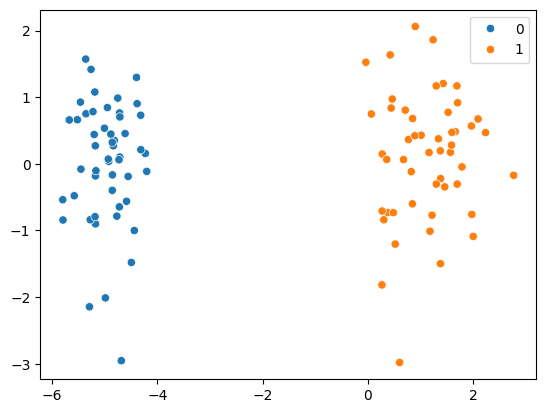

In [64]:
sns.scatterplot(x= X[:,0],y = X[:,1],hue = y)

In [65]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [66]:
def LogisticRegressor(X,y,epochs = 100000):
    weights = np.ones(X.shape[1]+1)
    lr = 0.1
    
    for _ in range(epochs):
        j = np.random.randint(0,X.shape[0])
        x = np.insert(X[j],0,1)
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr * (y[j] - y_hat)*x
    
    return weights

In [67]:
LogisticRegressor(X,y)
intercept_ = LogisticRegressor(X,y)[0]
coef_ = LogisticRegressor(X,y)[[1,2]]
print(f"coef_ = {coef_}\nintercept = {intercept_}")

coef_ = [3.97001172 0.16602435]
intercept = 6.3037850678795655


In [68]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [69]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-4.0, 2.5)

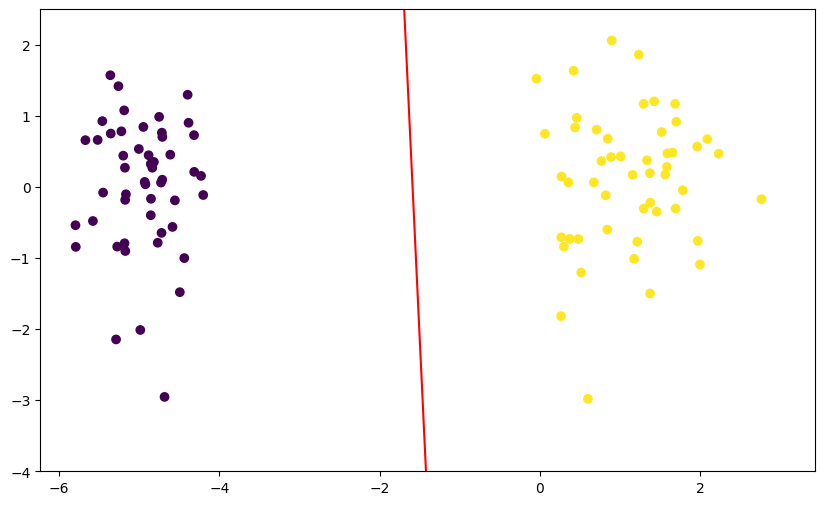

In [70]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color = 'red')
plt.scatter(X[:,0],X[:,1],c = y)
plt.ylim(-4,2.5)

## Perceptron trick

In [71]:
def perceptron(X,y,epochs = 10000):
    weights = np.ones(X.shape[1]+1)
    lr = 0.1
    
    for _ in range(epochs):
        j = np.random.randint(0,X.shape[0])
        x = np.insert(X[j],0,1)
        y_hat = step(np.dot(x,weights))
        weights = weights + lr * (y[j] - y_hat)*x
    
    return weights

In [72]:
def step(x):
    if x >=0:
        return 1
    else:
        return 0

In [73]:
perceptron(X,y)
intercept_ = perceptron(X,y)[0]
coef_ = perceptron(X,y)[[1,2]]
print(f"coef_ = {coef_}\nintercept = {intercept_}")
m_p = -(coef_[0]/coef_[1])
b_p = -(intercept_/coef_[1])
x_input_p = np.linspace(-3,3,100)
y_input_p = m_p*x_input + b_p

coef_ = [1.08682872 0.52024363]
intercept = 1.2000000000000002


### Here the differcene between perceptron(blue line) and actual Logistic regressor(red line) is clearly seen 

(-4.0, 2.5)

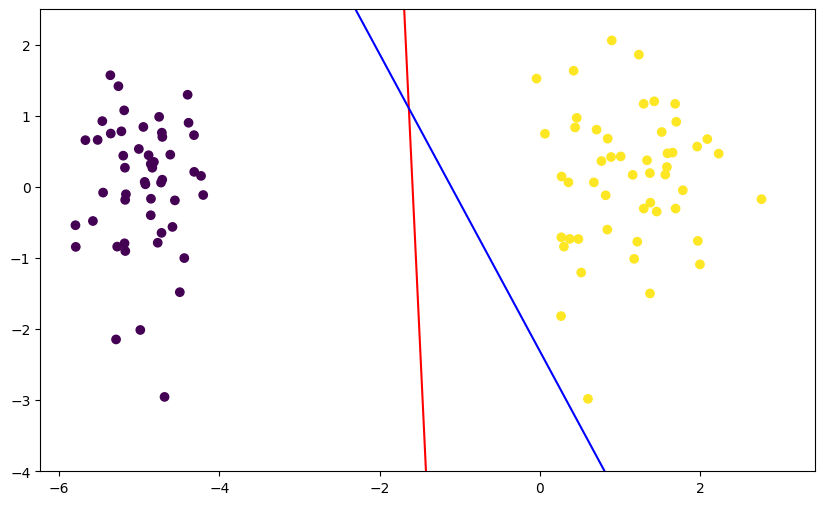

In [75]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color = 'red')
plt.plot(x_input_p,y_input_p,color = 'blue')
plt.scatter(X[:,0],X[:,1],c = y)
plt.ylim(-4,2.5)